In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/house_prices.csv')

## Data Loading and Exploration <a id="data-loading">
The training dataset is used to train the linear regression model, allowing it to learn the relationship between house size and price.

In [95]:
df

,size,price
0,106.181018,91.038609
1,192.607146,176.848212
2,159.799091,141.596379
3,139.798773,103.384703
4,73.402796,85.899299
...,...,...
95,124.069339,179.770879
96,128.409924,124.560862
97,114.131153,122.016907
98,53.812869,65.065485


In [96]:
df.head()

,size,price
0,106.181018,91.038609
1,192.607146,176.848212
2,159.799091,141.596379
3,139.798773,103.384703
4,73.402796,85.899299


In [97]:
df.describe()

,size,price
count,100.000000,100.000000
mean,120.527112,109.356234
std,44.623412,43.588474
min,50.828318,30.919275
25%,78.980114,70.613250
50%,119.621368,108.536825
75%,159.530468,142.090371
max,198.033040,213.411167


**Observations**:

In the training data, *size* values range from 50 m² to roughly 200 m², while the price values are between 30K\\$ and  213.4K\\$.

In [98]:
# Display entry counts and check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    100 non-null    float64
 1   price   100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


**Observations**:

The training dataset consists of 100 entries with no missing values, while the validation dataset contains 50 entries.

Both *size* and *price* columns are numeric (float64), which is suitable for applying linear regression model.

## Data Visualization <a id="Data-Visualization. Analiza exploratorie a datelor">

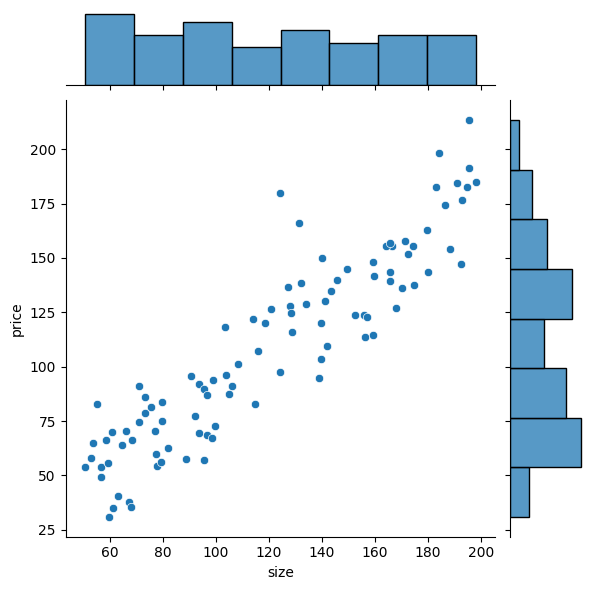

In [99]:
sns.jointplot(data = df, x='size', y='price')
plt.show()

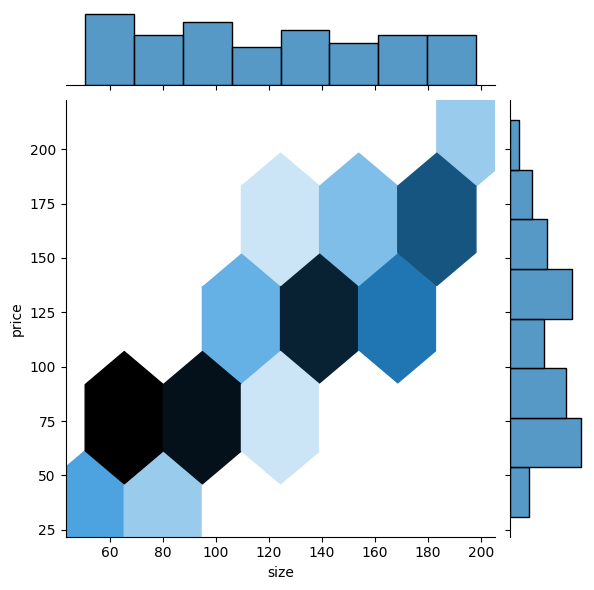

In [100]:
sns.jointplot(data = df, x='size', y = 'price', kind ='hex')

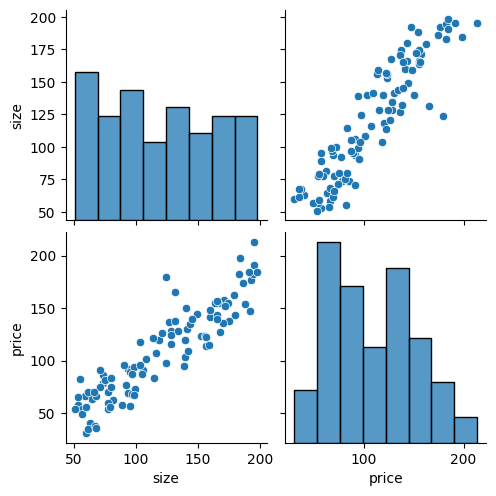

In [101]:
sns.pairplot(df)

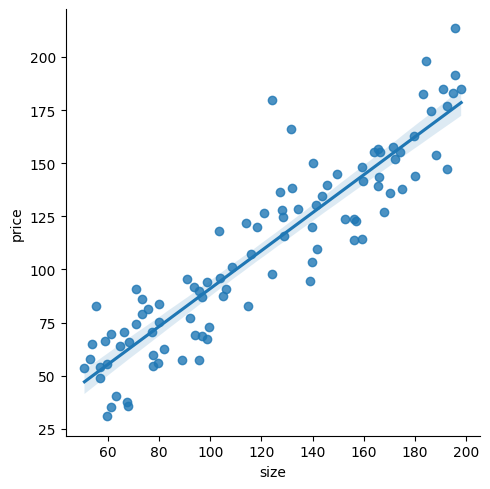

In [102]:
sns.lmplot(x='size', y='price', data=df)

## Training and Test Data.  <a id="Date de instruire și testare. ">

In [103]:
X = df[['size']]
y = df['price']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(70, 1) (70,)
(30, 1) (30,)


X_train.shape = (70, 1) → 70 training samples, 1 feature (size)
y_train.shape = (70,) → 70 target values (price)
X_test.shape = (30, 1) → 30 test samples, 1 feature
y_test.shape = (30,) → 30 target values
=> X has shape (rows, features), y is a 1D array with shape (rows,). The split is 70% training / 30% test.

## Model Training <a id="Antrenarea modelului">

In [105]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
lm.fit(X_train, y_train)


LinearRegression(n_jobs=1)

In [106]:
print(lm.intercept_)
print(lm.coef_)

3.635866873678964
[0.88436397]


## Predicting Test Data<a id="Prezicerea datelor de testare">

In [107]:
y_pred = lm.predict(X_test)
y_pred

array([ 88.21319678, 173.97068659, 168.47959497, 154.26918089,
       110.49554493,  66.35856684, 104.56934591, 150.67899605,
        55.55912329, 113.54155774,  91.74920874, 152.01126446,
       135.7406906 ,  57.74355069,  60.81071997,  70.47487381,
       176.47392143,  56.48345796, 127.26886405, 120.37769597,
        83.84976117, 116.843478  , 127.16824482,  73.85209249,
       144.95642519,  76.02182398,  95.40619131,  53.85367293,
        89.1072992 , 142.46926368])

Text(0, 0.5, 'Predicted Y')

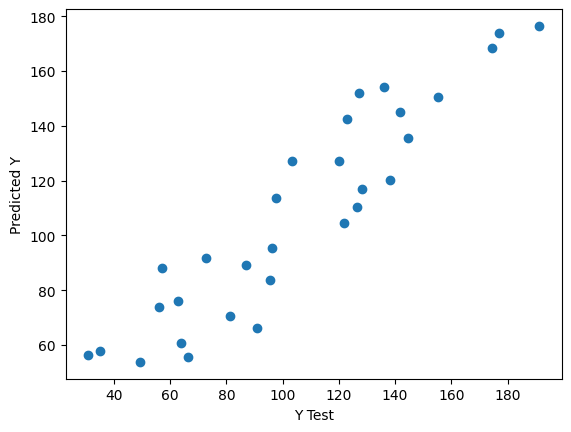

In [108]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Model Evaluation <a id="Evaluarea modelului">

In [109]:
from sklearn import metrics
# Mean Absolute Error
metrics.mean_absolute_error(y_test, y_pred)

np.float64(13.701630482298023)

In [110]:
#Root Mean Squared Error
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

np.float64(15.910264746135393)

In [111]:
# Mean Squared Error
metrics.mean_squared_error(y_test, y_pred)

np.float64(253.1365242921187)

In [112]:
#Scorul de variație – R²
metrics.r2_score(y_test, y_pred)

0.8560901413524774

## Residuals <a id="Reziduuri">

Text(0.5, 0, 'Prediction Error')

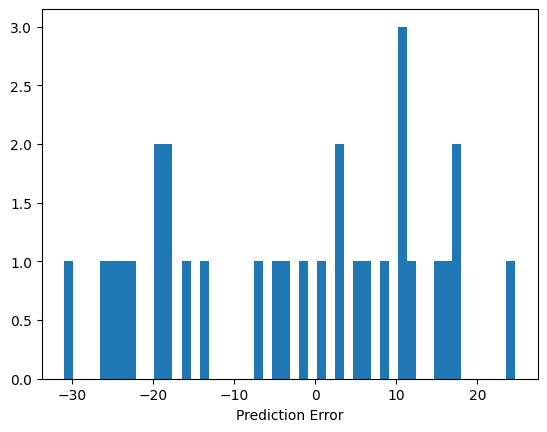

In [113]:
plt.hist(y_test - y_pred, bins=50)
plt.xlabel('Prediction Error')

In [114]:
coeff_df = pd.DataFrame(
    lm.coef_,
    X.columns,
    columns=['Coefficient']
)

coeff_df


,Coefficient
size,0.884364
